<a href="https://colab.research.google.com/github/codeTIT4N/google-bigquery-ethereum-balances/blob/main/ethereum_balances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas

project_id = 'bigquery-ethereum-bal' # replace with your project id

# Get top 10 ethereum addresses with their balances in decending order
df = pandas.io.gbq.read_gbq(
    '''
    SELECT *
    FROM `bigquery-public-data.crypto_ethereum.balances`
    ORDER BY eth_balance DESC
    LIMIT 10
    ''',
    project_id = project_id, dialect = 'standard'
)

In [42]:
# Top 10 richest addresses on ethreum
df
# note: These balances are in wei. 1 ether = 10^18 wei

,address,eth_balance
0,0x00000000219ab540356cbb839cbe05303d7705fa,16155287106802428144139100.000000000
1,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,3827217879104310329264999.000000000
2,0xbe0eb53f46cd790cd13851d5eff43d12404d33e8,1996008289413268335198349.000000000
3,0xda9dfa130df4de4673b89022ee50ff26f6ea73cf,1780839979118769395003802.000000000
4,0x0716a17fbaee714f1e6ab0f9d59edbc5f09815c0,1746037393895017987539780.000000000
5,0xf977814e90da44bfa03b6295a0616a897441acec,1447742259492607554807940.000000000
6,0x8315177ab297ba92a06054ce80a67ed4dbd7ed3a,838107943663529599553793.000000000
7,0x47ac0fb4f2d84898e4d9e7b4dab3c24507a6d503,584999084790800685289559.000000000
8,0x61edcdf5bb737adffe5043706e7c5bb1f1a56eea,479498954581340000000001.000000000
9,0xe92d1a43df510f82c66382592a047d288f85226f,450118326010976663088772.000000000


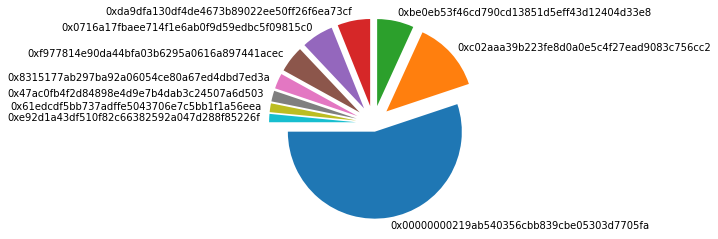

In [46]:
# simple pie chart representing
from matplotlib import pyplot as plt

values = df['eth_balance'].tolist()
labels = df['address'].tolist()

plt.pie(values,labels=labels,explode=[0.1,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2],startangle=180)

plt.show()

In [47]:
# convert ether balance to readable value
df['eth_balance_ether'] = df['eth_balance']/1000000000000000000
df

,address,eth_balance,eth_balance_ether
0,0x00000000219ab540356cbb839cbe05303d7705fa,16155287106802428144139100.000000000,16155287.1068024281441391
1,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,3827217879104310329264999.000000000,3827217.879104310329264999
2,0xbe0eb53f46cd790cd13851d5eff43d12404d33e8,1996008289413268335198349.000000000,1996008.289413268335198349
3,0xda9dfa130df4de4673b89022ee50ff26f6ea73cf,1780839979118769395003802.000000000,1780839.979118769395003802
4,0x0716a17fbaee714f1e6ab0f9d59edbc5f09815c0,1746037393895017987539780.000000000,1746037.39389501798753978
5,0xf977814e90da44bfa03b6295a0616a897441acec,1447742259492607554807940.000000000,1447742.25949260755480794
6,0x8315177ab297ba92a06054ce80a67ed4dbd7ed3a,838107943663529599553793.000000000,838107.943663529599553793
7,0x47ac0fb4f2d84898e4d9e7b4dab3c24507a6d503,584999084790800685289559.000000000,584999.084790800685289559
8,0x61edcdf5bb737adffe5043706e7c5bb1f1a56eea,479498954581340000000001.000000000,479498.954581340000000001
9,0xe92d1a43df510f82c66382592a047d288f85226f,450118326010976663088772.000000000,450118.326010976663088772


In [48]:
# how much ether does all the top 10 richest addresses own
df['eth_balance_ether'].sum()

Decimal('29305857.216873048693886095')

In [49]:
pip install num2words


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
# total ether owned by top 10 addresses in words
from num2words import num2words

num2words(df['eth_balance_ether'].sum())

'twenty-nine million, three hundred and five thousand, eight hundred and fifty-seven point two one six eight seven three zero four'